# COVID-19 - Stock Market 

* COVID-19 has impacted the world as a whole in a variety of ways. 
* I wanted to see how COVID-19 ie. the number of cases and deaths in the United States impacted the stock market. 
* There are a lot of measures to see how well the stock market is doing but for this project I wanted to see how the top companies were performing over-time with COVID-19 Cases as well as deaths
* There are couple downsides using the S&P 500 alone because, the S&P 500 is a essentially an index of the top 500 most valueable companies at any given time. This means that the companies in the S&P 500 changes over time depending on their value, which in turn means that a change in the overall S&P 500 value might not show the whole impact that COVID-19 had on a certain company but rather the 500 of the largest companies at any given point. 

### Hypothesis 1:

* As COVID-19 daily Cases and Deaths increase the S&P 500 values would decrease. 

### Hypothesis 2: 

* If Hypothesis 1 holds up, COVID-19 cases and deaths could prove to be a good feature while trying forecast S&P 500 using LSTM

# Data Sources

### COVID-19 Data 

* https://data.cdc.gov/

### S&P 500 Data

* https://finance.yahoo.com/v7/finance/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

# 1. Data Cleaning

## 1.1 COVID-19 Data
* Sum up all the data entries by date across all the states
* Include only relevant data columns such as "new cases" and "total cases"

### 1.1.1 Raw Data

In [4]:
covid_df = pd.read_csv(r'/data/users/ahiremat/LSTM-COVID-STOCK/Data/rows_1.csv')
covid_df.reset_index().head()

,index,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


### 1.1.2 Sorted Data
* Grouped by date and summed up cases
* Dropped irrelavant columns such as prob_cases etc

In [5]:
covid_df = covid_df.groupby(['submission_date']).sum()
covid_df = covid_df[["tot_cases", "new_case", "tot_death", "new_death"]].reset_index()
covid_df["submission_date"] = pd.to_datetime(covid_df["submission_date"])
covid_df = covid_df.set_index("submission_date")
covid_df.head()

,tot_cases,new_case,tot_death,new_death
submission_date,,,,
2020-01-22,1,1,0,0
2020-01-23,1,0,0,0
2020-01-24,2,1,0,0
2020-01-25,2,0,0,0
2020-01-26,5,3,0,0


## 1.2 S&P 500 Data
* Sum up all the data entries by date across all the states
* Include only relevant data columns such as "new cases" and "total cases"

### 1.2.1 Raw Data

In [6]:
sp_df = pd.read_csv(r'/data/users/ahiremat/LSTM-COVID-STOCK/Data/GSPC.csv') 
sp_df["Date"] = pd.to_datetime(sp_df["Date"])
sp_df = sp_df.set_index("Date")
sp_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-13,3166.649902,3182.679932,3156.510010,3168.800049,3168.800049,3736870000
2019-12-16,3183.629883,3197.709961,3183.629883,3191.449951,3191.449951,4051790000
2019-12-17,3195.399902,3198.219971,3191.030029,3192.520020,3192.520020,3837540000
2019-12-18,3195.209961,3198.479980,3191.139893,3191.139893,3191.139893,4014080000
2019-12-19,3192.320068,3205.479980,3192.320068,3205.370117,3205.370117,3720450000


### 1.2.2 Cleaned Data 
* There were missing data points for Saturday, Sunday and Holidays because the stock market is closed
* Considered omitting COVID-19 numbers on the weekend and holidays but decided that it was more important to include COVID-19 numbers over the weekend as well
* **Filled the missing days with the previous day's value**

In [7]:
index = pd.date_range("2020-01-22","2020-11-15")
sp_df = sp_df.reindex(index)
sp_df = sp_df.fillna(method='pad')
sp_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
2020-01-22,3330.020020,3337.770020,3320.040039,3321.750000,3321.750000,3.619850e+09
2020-01-23,3315.770020,3326.879883,3301.870117,3325.540039,3325.540039,3.764860e+09
2020-01-24,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3.707130e+09
2020-01-25,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3.707130e+09
2020-01-26,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3.707130e+09
2020-01-27,3247.159912,3258.850098,3234.500000,3243.629883,3243.629883,3.823100e+09
2020-01-28,3255.350098,3285.780029,3253.219971,3276.239990,3276.239990,3.526720e+09
2020-01-29,3289.459961,3293.469971,3271.889893,3273.399902,3273.399902,3.584500e+09
2020-01-30,3256.449951,3285.909912,3242.800049,3283.659912,3283.659912,3.787250e+09
2020-01-31,3282.330078,3282.330078,3214.679932,3225.520020,3225.520020,4.527830e+09


## 1.3 Consolidate Data
* Combine both data frames into one

In [9]:
merged_df = covid_df.merge(sp_df, left_index = True, right_index = True )
merged_df = merged_df.drop(columns = ["Volume"])
merged_df.head()

,tot_cases,new_case,tot_death,new_death,Open,High,Low,Close,Adj Close
2020-01-22,1,1,0,0,3330.020020,3337.770020,3320.040039,3321.750000,3321.750000
2020-01-23,1,0,0,0,3315.770020,3326.879883,3301.870117,3325.540039,3325.540039
2020-01-24,2,1,0,0,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971
2020-01-25,2,0,0,0,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971
2020-01-26,5,3,0,0,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971


# 2. Data Analysis

## 2.1 Overview

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

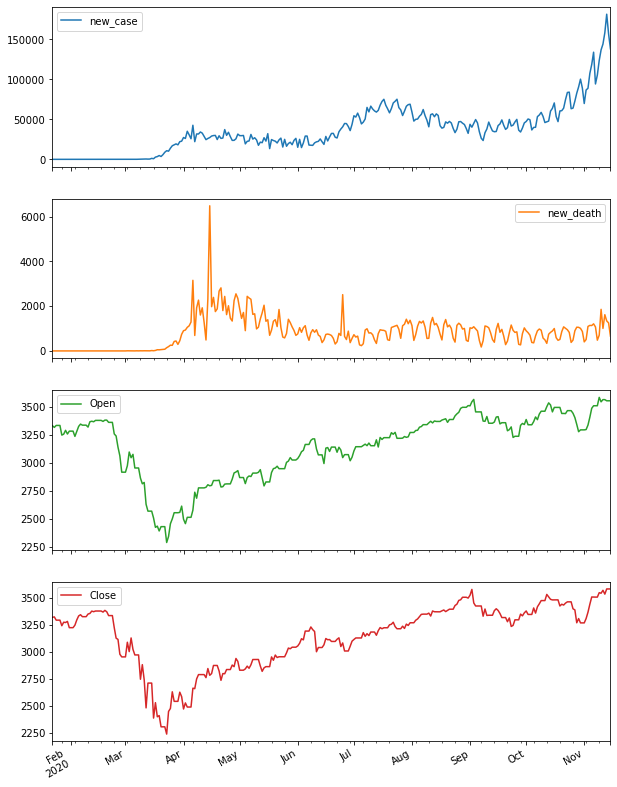

In [14]:
merged_df.drop(columns = ["tot_cases","tot_death", "Low", "High", "Adj Close"]).plot(subplots = True, figsize = (10, 15))

### Remaks: 
* No obvious visual trend
* Stock market hit its lowest point as COVID-19 Cases and deaths began to spike

## 2.2 Pearson (R) Correlation Calculation

In [21]:
corr_df = merged_df.corr()
corr_df = corr_df[["Open", "High", "Low", "Close", "Adj Close"]]
corr_df = corr_df.iloc[:4]
corr_df.style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Adj Close
tot_cases,0.690405,0.703937,0.685287,0.693413,0.693413
new_case,0.459299,0.468674,0.467804,0.468593,0.468593
tot_death,0.669930,0.678208,0.669324,0.673035,0.673035
new_death,-0.140691,-0.150735,-0.111636,-0.129606,-0.129606


### Remarks: 
* Shows a high positive correlation with total cases and total deaths
* Shows a slight negative correlation between new deaths